In [ ]:
!pip install xlrd

In [1]:
import pandas as pd
import numpy as np
from sklearn.svm import LinearSVR
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import cross_val_score, RepeatedKFold
from sklearn.multioutput import RegressorChain
from numpy import mean, std, absolute
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_excel('Data/Gasification Data_Daya.xlsx', index_col=0, header=0)
data = data.iloc[1:223,:14] 
display(list(data.columns.values))

# Drop null balues and store dataframe in dataframe 2
data=data.dropna()
print(data)

#Check Null values again after removing
print(data.isnull().values.any())
print(data.isna().values.any())

['C [%wt db]',
 'H [%wt db]',
 'O [%wt db]',
 'Moisture [%wt]',
 'Ash [%wt db]',
 'ER [-]',
 'T [ºC]',
 'Bed material',
 'Steam/Biomass',
 'H2 [%vol N2 free]',
 'CO [%vol N2 free]',
 'CO2 [%vol N2 free]',
 'CH4 [%vol N2 free]',
 'GY [Nm3/kg daf]']

        C [%wt db] H [%wt db]  O [%wt db] Moisture [%wt]  Ash [%wt db]  \
Sr No.                                                                   
2            50.00        5.7       44.10             21          0.85   
3            50.00        5.7       44.10             23          0.85   
4            50.00        5.7       44.10             22          0.85   
5            50.00        5.7       44.10             25          0.85   
6            50.00        5.7       44.10             19          0.85   
...            ...        ...         ...            ...           ...   
219          46.85        6.3       45.55              9          1.30   
220          46.85        6.3       45.55              9          1.30   
221          46.76       5.68       39.46           9.94          8.10   
222          46.76       5.68       39.46           9.94          8.10   
223          46.76       5.68       39.46           9.94          8.10   

        ER [-]  T [ºC]  Bed material 

In [18]:
X = data.iloc[:, :9]
y = data.iloc[:, 9:]

input_columns = list(X.columns.values)
output_columns = list(y.columns.values)

print(input_columns, output_columns)

['C [%wt db]', 'H [%wt db]', 'O [%wt db]', 'Moisture [%wt]', 'Ash [%wt db]', 'ER [-]', 'T [ºC]', 'Bed material', 'Steam/Biomass'] ['H2 [%vol N2 free]', 'CO [%vol N2 free]', 'CO2 [%vol N2 free]', 'CH4 [%vol N2 free]', 'GY [Nm3/kg daf]']


In [ ]:
X['Ash [%wt db]'].describe()

In [ ]:
X['H [%wt db]'].plot(kind='kde', figsize=(12,6))
y['CO [%vol N2 free]'].plot(kind='kde', figsize=(12,6))

## Multi-output Regression

In [ ]:
# define base model
model = LinearSVR()
# define the chained multioutput wrapper model
wrapper = RegressorChain(model)
# define the evaluation procedure
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the model and collect the scores
n_scores = cross_val_score(wrapper, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
print(len(n_scores))
# force the scores to be positive
n_scores = absolute(n_scores)
# summarize performance
print('MAE: %.3f (+/-%.3f)' % (mean(n_scores), std(n_scores)))

## Plot

In [ ]:
#sns.set_theme(style="whitegrid")

X.columns = X.columns.map("-".join)

# Compute a correlation matrix and convert to long-form
corr_mat = X.corr().stack().reset_index(name="correlation")

# Draw each cell as a scatter point with varying size and color
g = sns.relplot(
    data=corr_mat,
    x="level_0", y="level_1", hue="correlation", size="correlation",
    palette="vlag", hue_norm=(-1, 1), edgecolor=".7",
    height=10, sizes=(50, 250), size_norm=(-.2, .8),
)

# Tweak the figure to finalize
g.set(xlabel="", ylabel="", aspect="equal")
g.despine(left=True, bottom=True)
g.ax.margins(.02)
for label in g.ax.get_xticklabels():
    label.set_rotation(90)
# for artist in g.legend.legendHandles:
#     artist.set_edgecolor(".7")

## More exploration

In [ ]:
X.describe()

In [ ]:
data.describe()

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
_ = sns.boxplot(data=data, x=input_columns[0], y=output_columns[0], ax=ax1)
_ = sns.boxplot(data=data, x=input_columns[1], y=output_columns[0], ax=ax2)

In [ ]:
for odx in range(len(output_columns)):
    plt.figure(figsize=(60, 60))
    for idx1 in range(len(input_columns)):
        for idx2 in range(len(input_columns)):
            plt.subplot(len(input_columns), len(input_columns), (len(input_columns)*idx1) + idx2 +1)
            sns.scatterplot(data=data, x=input_columns[idx1], y=input_columns[idx2], hue=output_columns[odx])
    plt.savefig('ScatterPlot_Output_' + output_columns[odx] + '.pdf')


In [ ]:
plt.figure(figsize=(60, 60))
for idx1 in range(len(input_columns)):
    for idx2 in range(len(input_columns)):
        plt.subplot(len(input_columns), len(input_columns), (len(input_columns)*idx1) + idx2 +1)
        sns.scatterplot(data=data, x=input_columns[idx1], y=input_columns[idx2], hue=output_columns[4])
plt.savefig('ScatterPlot_Output_GY.pdf')

## Multi-output Regression

In [19]:
X = X.to_numpy()
y = y.to_numpy()
print(X.shape, y)

(187, 9) [[22.78177458 31.17505995 35.97122302  6.47482014  2.5       ]
 [23.88059701 29.85074627 35.82089552  7.1641791   2.5       ]
 [20.38369305 31.17505995 35.97122302  6.47482014  2.1       ]
 [22.78177458 31.17505995 35.97122302  6.47482014  2.4       ]
 [17.27272727 32.72727273 24.54545455  8.18181818  2.1       ]
 [14.70934337 33.60790774 40.12708873  8.16662744  1.89079879]
 [16.53898152 29.04461469 38.19287968  7.59351059  2.18402427]
 [19.15823367 29.64581417 37.39650414  7.98068077  2.31547017]
 [16.64233577 28.22384428 40.77858881  8.44282238  2.36602629]
 [12.23564955 25.95669688 40.18126888  7.98086606  2.48736097]
 [21.4        42.85       20.48        9.32        1.56294402]
 [28.2        39.3        19.5         8.28        1.65038145]
 [32.19       37.7        18.64        7.6         2.76520865]
 [36.29       34.56       18.7         7.3         2.67777122]
 [39.42       33.35       19.25        6.13        2.76520865]
 [32.11       37.92       17.75        7.79   

In [20]:

# evaluate multioutput regression model with k-fold cross-validation
from numpy import absolute
from numpy import mean
from numpy import std
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

# define model
model = DecisionTreeRegressor()
# define the evaluation procedure
cv = RepeatedKFold(n_splits=5, n_repeats=5, random_state=1)
# evaluate the model and collect the scores
n_scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force the scores to be positive
n_scores = absolute(n_scores)
# summarize performance
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))


MAE: 2.281 (0.439)


In [21]:
# evaluate multioutput regression model with k-fold cross-validation
from sklearn.linear_model import LinearRegression

# define model
model = LinearRegression()
# define the evaluation procedure
cv = RepeatedKFold(n_splits=5, n_repeats=5, random_state=1)
# evaluate the model and collect the scores
n_scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force the scores to be positive
n_scores = absolute(n_scores)
# summarize performance
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

MAE: 3.667 (0.358)


In [22]:
# evaluate multioutput regression model with k-fold cross-validation
from sklearn.neighbors import KNeighborsRegressor

# define model
model = KNeighborsRegressor()
# define the evaluation procedure
cv = RepeatedKFold(n_splits=5, n_repeats=5, random_state=1)
# evaluate the model and collect the scores
n_scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force the scores to be positive
n_scores = absolute(n_scores)
# summarize performance
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

MAE: 2.984 (0.338)


In [23]:
# evaluate multioutput regression model with k-fold cross-validation
from sklearn.ensemble import RandomForestRegressor

# define model
model = RandomForestRegressor()
# define the evaluation procedure
cv = RepeatedKFold(n_splits=5, n_repeats=5, random_state=1)
# evaluate the model and collect the scores
n_scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force the scores to be positive
n_scores = absolute(n_scores)
# summarize performance
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

MAE: 1.913 (0.315)


### Wrapper methods

In [24]:
# direct multioutput regression
from sklearn.multioutput import MultiOutputRegressor

# define base model
model = RandomForestRegressor()
# define the direct multioutput wrapper model
wrapper = MultiOutputRegressor(model)
# define the evaluation procedure
cv = RepeatedKFold(n_splits=5, n_repeats=5, random_state=1)
# evaluate the model and collect the scores
n_scores = cross_val_score(wrapper, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force the scores to be positive
n_scores = absolute(n_scores)
# summarize performance
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

MAE: 1.904 (0.328)


In [9]:
# chained multioutput regression
from sklearn.multioutput import RegressorChain

# define base model
model = RandomForestRegressor()
# define the chained multioutput wrapper model
wrapper = RegressorChain(model)
# define the evaluation procedure
cv = RepeatedKFold(n_splits=5, n_repeats=5, random_state=1)
# evaluate the model and collect the scores
n_scores = cross_val_score(wrapper, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force the scores to be positive
n_scores = absolute(n_scores)
# summarize performance
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

MAE: 1.991 (0.346)


In [10]:
print(len(X))

187


# MultiOutput Regression using Random Forests

(67, 9) (67, 5)


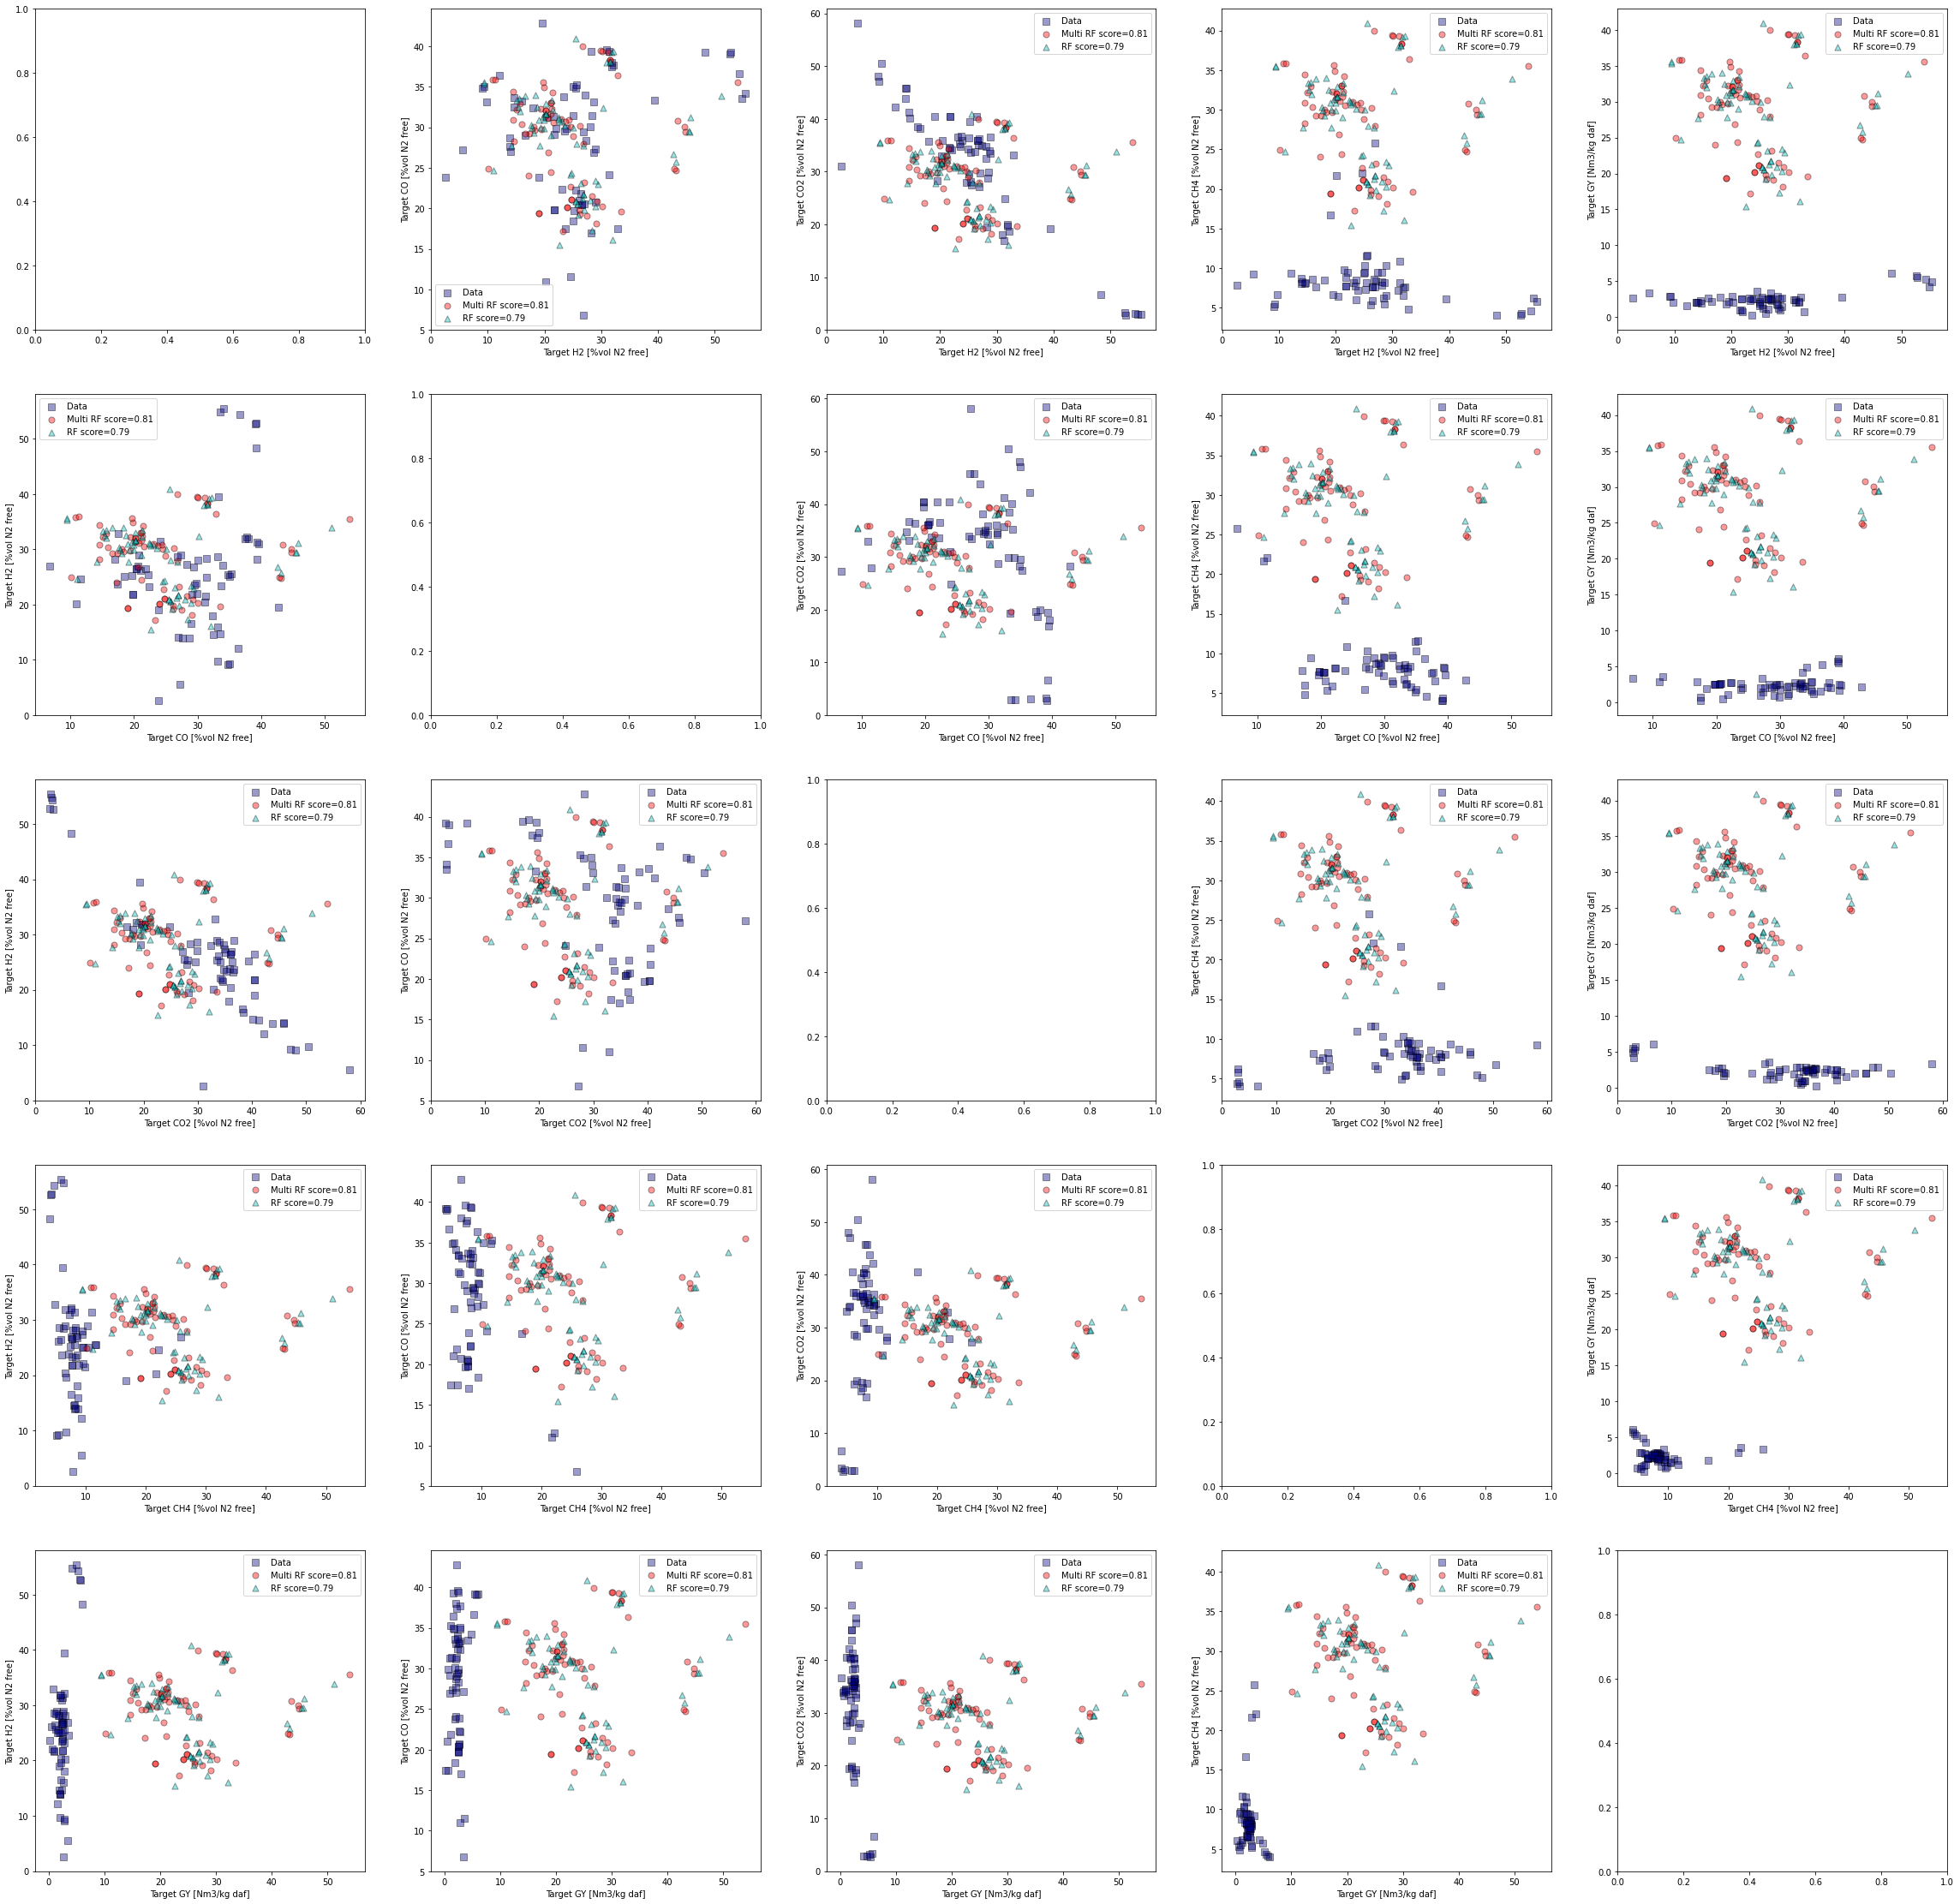

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=120, test_size=67, random_state=4)

print(X_test.shape, y_test.shape)

max_depth = 30
regr_multirf = MultiOutputRegressor(RandomForestRegressor(n_estimators=100,
                                                          max_depth=max_depth,
                                                          random_state=0))
regr_multirf.fit(X_train, y_train)

regr_rf = RandomForestRegressor(n_estimators=100, max_depth=max_depth,
                                random_state=2)
regr_rf.fit(X_train, y_train)

# Predict on new data
y_multirf = regr_multirf.predict(X_test)
y_rf = regr_rf.predict(X_test)

#print(np.asarray(y_test[:, 0]))

# Plot the results
plt.figure(figsize=(40, 40))
s = 50
a = 0.4
for idx1 in range(5):
    for idx2 in range(5):
        plt.subplot(5, 5, (5*idx1) + idx2 +1)
        if idx1 != idx2:
            plt.scatter(y_test[:, idx1], y_test[:, idx2], edgecolor='k', c="navy", s=s, marker="s", alpha=a, label="Data")
            plt.scatter(y_multirf[:, 0], y_multirf[:, 1], edgecolor='k', c="red", s=s, alpha=a,
                        label="Multi RF score=%.2f" % regr_multirf.score(X_test, y_test))
            plt.scatter(y_rf[:, 0], y_rf[:, 1], edgecolor='k', c="c", s=s, marker="^", alpha=a,
                        label="RF score=%.2f" % regr_rf.score(X_test, y_test))
            # plt.xlim([-6, 6])
            # plt.ylim([-6, 6])
            plt.xlabel("Target %s" % output_columns[idx1])
            plt.ylabel("Target %s" % output_columns[idx2])
            plt.legend()
plt.savefig('Output_distribution_RandomForest.pdf')            
plt.show()

Feature ranking:
1. feature 1 (0.276261)
2. feature 2 (0.155102)
3. feature 6 (0.151441)
4. feature 5 (0.091180)
5. feature 4 (0.078941)
6. feature 0 (0.063316)
7. feature 3 (0.062458)
8. feature 7 (0.061681)
9. feature 8 (0.059620)


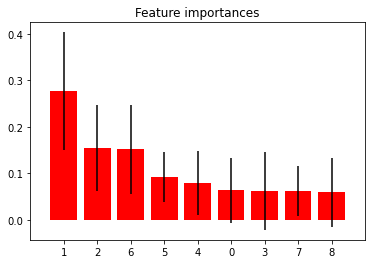

In [34]:
# Feature importance
importances = regr_rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in regr_rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.savefig('Feature_Importance_RandomForest.pdf') 
plt.show()